<a id='top'></a>

<div>
<img src="https://github.com/Yairvedaniel/project1/blob/main/PHOTO-2024-06-05-14-34-50.jpg?raw=true" width="400"/>
</div>


1. [Handling data](#section1)

   1.1 [Fix columns](#section1.1)   
   1.2 [checking values](#section1.2)  
   1.3 [Melt the data](#melting)\
   1.4 [Outliers](#section1.4)    
   1.5 [Transformations](#section1.5)


### information on tha data
We'll work with a dataset, based on [Google Play Store](https://play.google.com/store/apps)

The source of the data file  [here](https://www.kaggle.com/datasets/bhavikjikadara/google-play-store-applications/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/hodsfiles/HrDataProject/main/googleplaystore.csv'
apps = pd.read_csv(url)
apps.head(30)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


In [3]:
apps.shape

(10841, 14)

<a id='section1'></a>
### 1. Handling Data
[back to top](#top)
<a id='section1.1'></a>
#### 1.1 Fix columns

In [4]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [5]:
apps = apps.drop('Unnamed: 0', axis=1)
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<a id='section1.2'></a>
#### 1.2 checking values
[back to top](#top)

In [6]:
apps.shape

(10841, 13)

In [7]:
apps.duplicated().sum()

483

In [8]:
#On play store, two apps may have same name, but all the size, installs, rating, reviews, price need not be same. so using these categories, we will drop the duplicates in the data
apps.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

In [9]:
apps.duplicated().sum()

0

In [10]:
apps.shape

(10350, 13)

In [11]:
apps.dtypes


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
# Columns to clean 
cols = ['Installs','Price']

# Characters to remove
chars = ['+',",","$"]

# storing columns_to_clean in col variable
for col in cols:
    # storing characters_to_clean in char variable
    for char in chars:
        # Replacing unnecessary characters with empty string
        apps[col] = apps[col].apply(lambda c: c.replace(char, ''))


In [13]:

# ניקוי המילים "and up" מהעמודה "Android Ver"
apps['Android Ver'] = apps['Android Ver'].str.replace('and up', '', regex=False)


In [14]:

def size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1000
    return None

apps.loc[:, 'Size_MB'] = apps['Size'].apply(size_to_mb)

# Display the first few rows to verify the changes
print(apps[['Size', 'Size_MB']].head())

   Size  Size_MB
0   19M     19.0
1   14M     14.0
2  8.7M      8.7
3   25M     25.0
4  2.8M      2.8


In [15]:
apps['Price'].unique()

array(['0', '4.99 ', '3.99 ', '6.99 ', '1.49 ', '2.99 ', '7.99 ', '5.99 ',
       '3.49 ', '1.99 ', '9.99 ', '7.49 ', '0.99 ', '9.00 ', '5.49 ',
       '10.00 ', '24.99 ', '11.99 ', '79.99 ', '16.99 ', '14.99 ',
       '1.00 ', '29.99 ', '12.99 ', '2.49 ', '10.99 ', '1.50 ', '19.99 ',
       '15.99 ', '33.99 ', '74.99 ', '39.99 ', '3.95 ', '4.49 ', '1.70 ',
       '8.99 ', '2.00 ', '3.88 ', '25.99 ', '399.99 ', '17.99 ',
       '400.00 ', '3.02 ', '1.76 ', '4.84 ', '4.77 ', '1.61 ', '2.50 ',
       '1.59 ', '6.49 ', '1.29 ', '5.00 ', '13.99 ', '299.99 ', '379.99 ',
       '37.99 ', '18.99 ', '389.99 ', '19.90 ', '8.49 ', '1.75 ',
       '14.00 ', '4.85 ', '46.99 ', '109.99 ', '154.99 ', '3.08 ',
       '2.59 ', '4.80 ', '1.96 ', '19.40 ', '3.90 ', '4.59 ', '15.46 ',
       '3.04 ', '4.29 ', '2.60 ', '3.28 ', '4.60 ', '28.99 ', '2.95 ',
       '2.90 ', '1.97 ', '200.00 ', '89.99 ', '2.56 ', '30.99 ', '3.61 ',
       '394.99 ', '1.26 ', 'Everyone', '1.20 ', '1.04 '], dtype=object)

In [16]:
apps = apps.drop('Size', axis=1)

In [17]:
apps.shape

(10350, 13)

In [18]:
apps.head(30)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4,2.8
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,50000,Free,0,Everyone,Art & Design,26-Mar-17,1,2.3,5.6
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,50000,Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3,19.0
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,1000000,Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2,29.0
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,1000000,Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0,33.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,10000,Free,0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3,3.1


In [19]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [20]:
apps.Reviews = pd.to_numeric(apps.Reviews, errors='coerce')
apps.Price = pd.to_numeric(apps.Price, errors='coerce')
apps.Rating = pd.to_numeric(apps.Rating, errors='coerce')
apps.Installs = pd.to_numeric(apps.Installs, errors='coerce') 
apps.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [21]:
apps.replace('Varies with device', np.nan, inplace=True)

In [22]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)

Missing data before handling:
App                  0
Category             0
Rating            1465
Reviews              1
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver       1310
Android Ver       1224
Size_MB           1526
dtype: int64


In [23]:
missing_index_Reviews = apps[apps['Reviews'].isnull()].index
missing_index_Installs = apps[apps['Installs'].isnull()].index
missing_index_Type = apps[apps['Type'].isnull()].index
missing_index_Price = apps[apps['Price'].isnull()].index
missing_index_Content_Rating = apps[apps['Content Rating'].isnull()].index

In [24]:
#apps = apps.drop(missing_index_Reviews)
#apps = apps.drop(missing_index_Installs)
#apps = apps.drop(missing_index_Type)
#apps = apps.drop(missing_index_Price)
#apps = apps.drop(missing_index_Content_Rating)

<AxesSubplot:xlabel='Size_MB', ylabel='Count'>

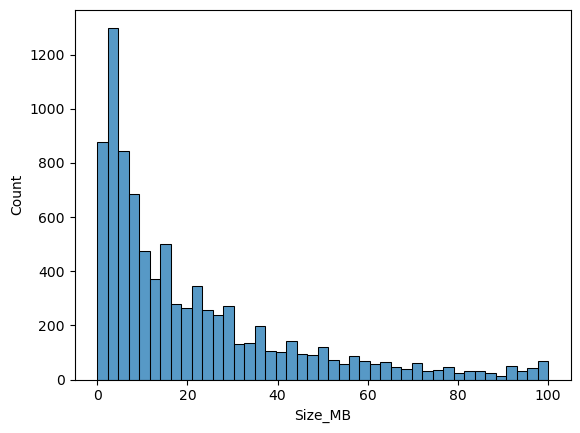

In [25]:
#לבדוק אולי כדאי לעשות את זה על פי לוג וייראה יותר ברור.
sns.histplot(apps, x = 'Size_MB')

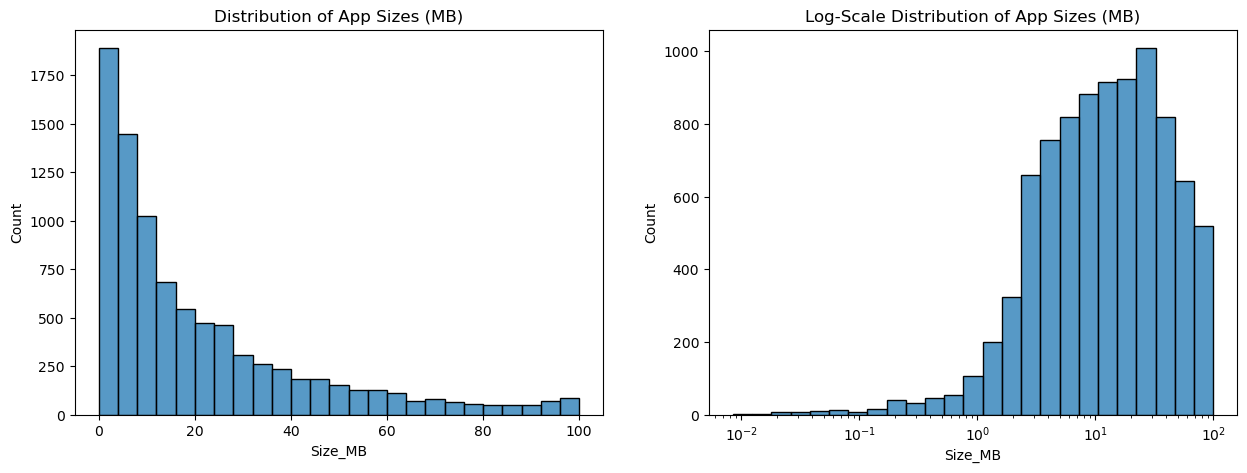

In [26]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.histplot(apps['Size_MB'], ax=axes[0], bins=25)
sns.histplot(apps['Size_MB'], log_scale=True, ax=axes[1], bins=25)

axes[0].set_title('Distribution of App Sizes (MB)')
axes[1].set_title('Log-Scale Distribution of App Sizes (MB)')
plt.show()

<AxesSubplot:ylabel='Size_MB'>

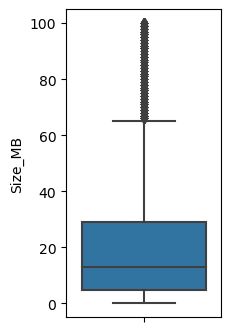

In [27]:
plt.figure(figsize=(2,4))
sns.boxplot(data = apps, y= 'Size_MB')

In [28]:
top_10_installs = apps.sort_values(by='Installs', ascending=False).head(10)

#On play store, two apps may have same name, but all the size, installs, rating, reviews, price need not be same. so using these categories, we will drop the duplicates in the data
apps.drop_duplicates(['App','Installs'], inplace=True)
# הצגת האפליקציות עם הכי הרבה התקנות
print(top_10_installs[[ 'App','Installs']])

                            App      Installs
340                       Gmail  1.000000e+09
4098  Maps - Navigate & Explore  1.000000e+09
3117  Maps - Navigate & Explore  1.000000e+09
1700             Subway Surfers  1.000000e+09
1654             Subway Surfers  1.000000e+09
3904         WhatsApp Messenger  1.000000e+09
1750             Subway Surfers  1.000000e+09
3665                    YouTube  1.000000e+09
2884              Google Photos  1.000000e+09
865           Google Play Games  1.000000e+09


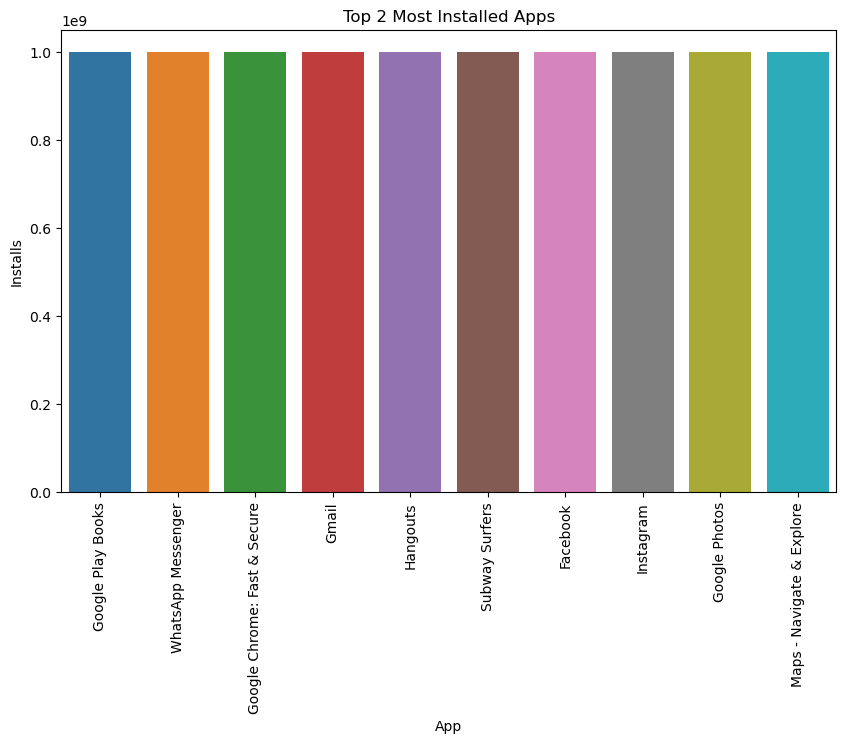

In [29]:
apps_list = ["Google Play Books", "Subway Surfers", "Facebook", "Google Photos", 
    "Instagram", "Maps - Navigate & Explore", "Hangouts", 
    "Gmail", "Google Chrome: Fast & Secure", "WhatsApp Messenger"]

# סינון הנתונים עבור האפליקציות שצוינו
filtered_data = apps[apps['App'].isin(apps_list)]

# מציאת 2 האפליקציות עם הכי הרבה התקנות
top_2_apps = filtered_data['App'].value_counts().index[:]

# יצירת גרף בר עם seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='App', y='Installs', order=top_2_apps)
plt.title('Top 2 Most Installed Apps')
plt.xlabel('App')
plt.ylabel('Installs')
plt.xticks(rotation=90)
plt.show()

In [30]:
#apps["Size_MB"] = apps["Size_MB"].apply(lambda x: x.fillna(x.mean()))

In [31]:
# Separate numeric and non-numeric columns
numeric_cols = apps.select_dtypes(include=[np.number]).columns
non_numeric_cols = apps.select_dtypes(exclude=[np.number]).columns

# Fill missing values for numeric columns with the median
apps[numeric_cols] = apps[numeric_cols].apply(lambda x: x.fillna(x.mean()))

# Fill missing values for non-numeric columns with the mode
apps[non_numeric_cols] = apps[non_numeric_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no more missing values
missing_data_after = apps.isnull().sum()
print("Missing data after handling:")
print(missing_data_after)

Missing data after handling:
App               0
Category          0
Rating            0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Size_MB           0
dtype: int64


In [32]:
#apps['Type'] = apps['Type'].map({'Free': 0, 'Paid': 1})

In [33]:
#apps.hist(bins=30, figsize=(15,10), color='b')

In [34]:

apps.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,0.0,Teen,Art & Design,8-Jun-18,1,4.2,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4,2.8


In [35]:
#plt.figure(figsize=(14, 12))
#correlation_matrix = apps.corr(numeric_only=True)
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
#plt.title('Correlation Heatmap of Google Play Store Data')
#plt.show()

Number of categories =  34


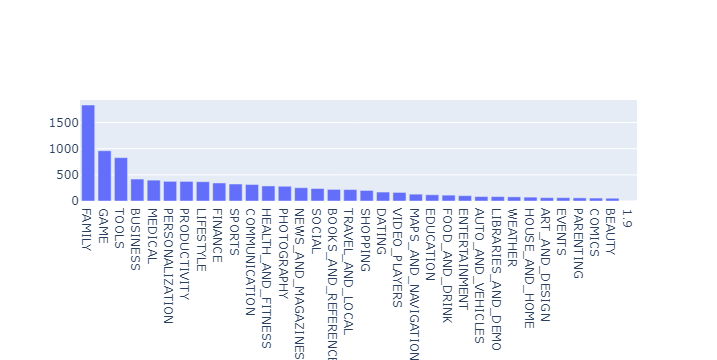

In [36]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps["Category"].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps["Category"].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

In [37]:
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_MB'],
      dtype='object')

Number of options =  6


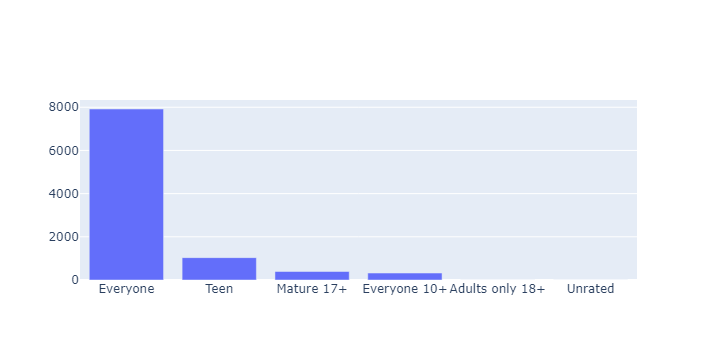

In [38]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_options = len(apps["Content Rating"].unique())
print('Number of options = ', num_options)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_Content_Rating = apps["Content Rating"].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_Content_Rating.index, # index = category name
        y = num_apps_in_Content_Rating.values, # value = count
)]

plotly.offline.iplot(data)

Average app rating =  4.17525270977934


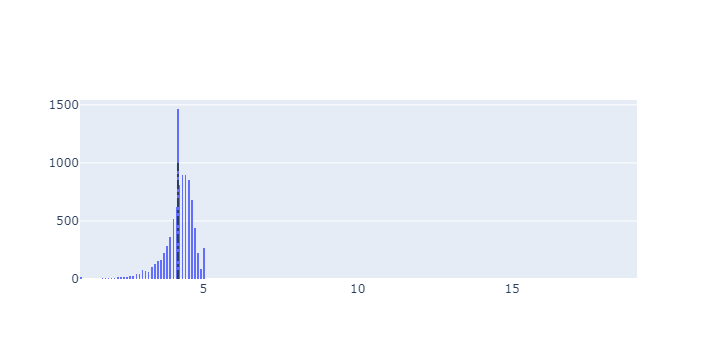

In [39]:
# Average rating of apps
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

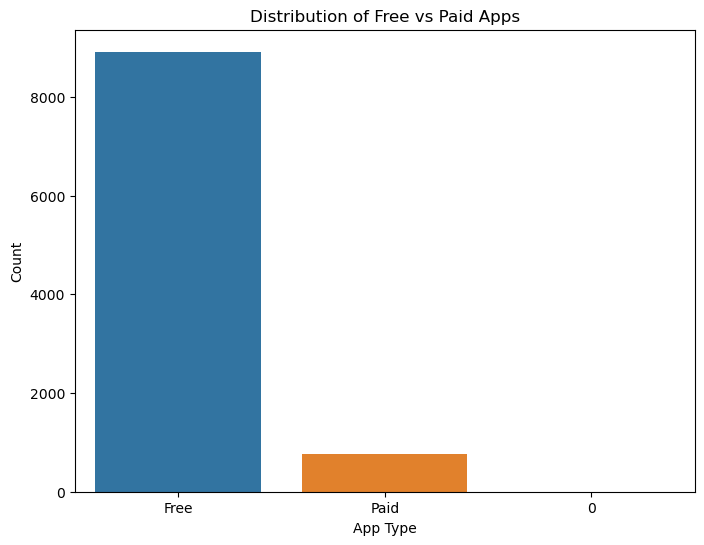

In [40]:
data_cleaned = apps.dropna(subset=['Type', 'Rating'])

# יצירת גרף עמודות המציג את התפלגות האפליקציות החינמיות מול האפליקציות בתשלום
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=data_cleaned)
plt.title('Distribution of Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Count')
plt.show()


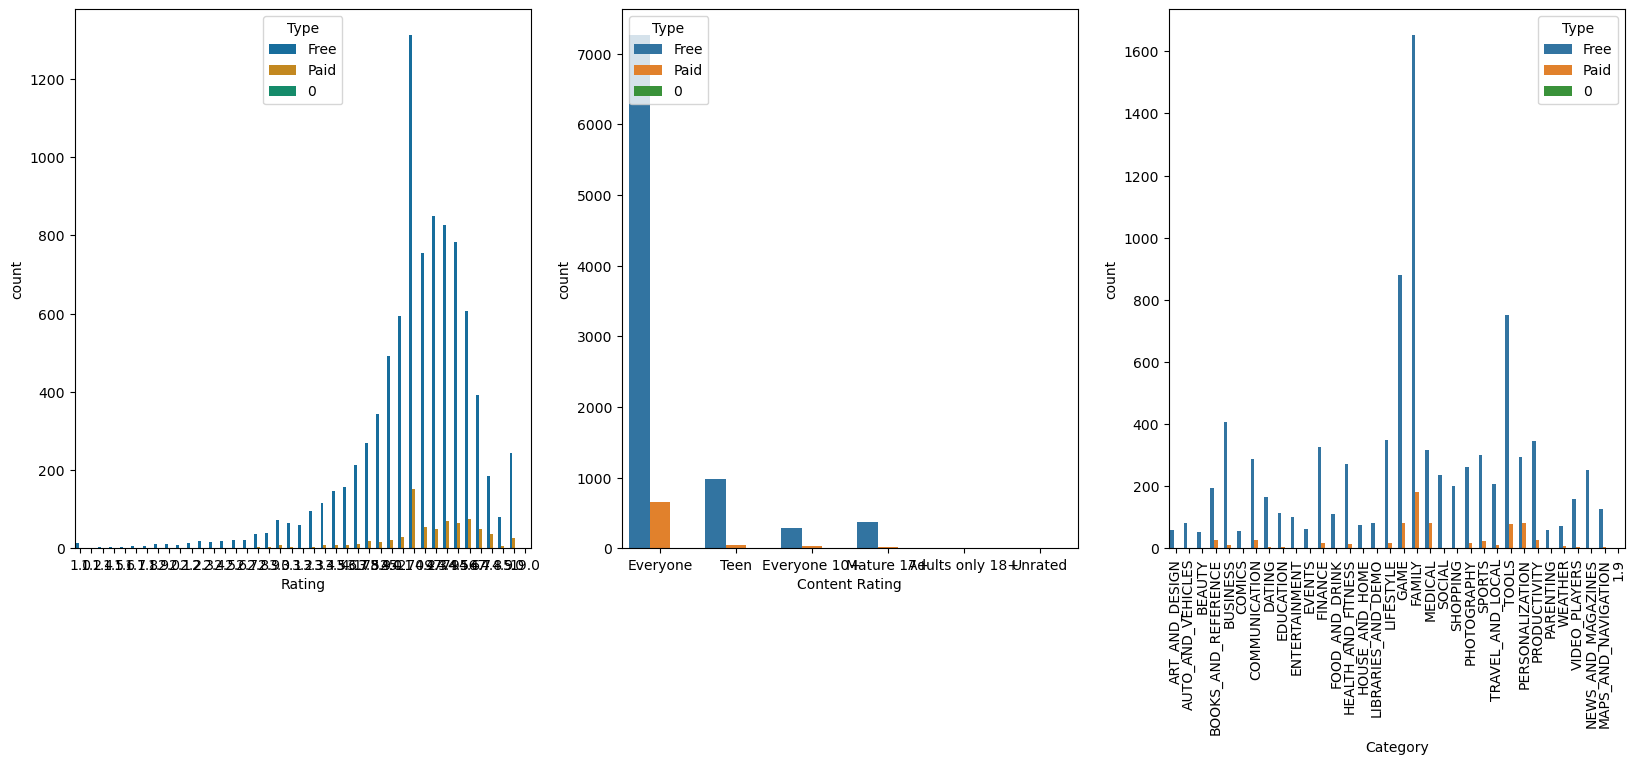

In [41]:
fig, ax =plt.subplots(ncols=3, figsize=(20, 7))
sns.countplot(data=apps,x='Rating',hue='Type',ax=ax[0],palette='colorblind')
sns.countplot(data=apps,x='Content Rating',hue='Type',ax=ax[1])
sns.countplot(data=apps,x='Category',hue='Type',ax=ax[2])
plt.xticks(rotation=90)
plt.show()

In [42]:
data_cleaned = apps.dropna(subset=['Rating', 'Type'])
data_cleaned.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,0.0,Teen,Art & Design,8-Jun-18,1,4.2,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4,2.8


In [43]:
# חישוב הדירוג הממוצע לאפליקציות בתשלום
average_rating_paid = data_cleaned[data_cleaned['Type'] == 'Paid']['Rating'].mean()

# חישוב הדירוג הממוצע לאפליקציות חינמיות
average_rating_free = data_cleaned[data_cleaned['Type'] == 'Free']['Rating'].mean()

print(f'The average rating of paid apps is: {average_rating_paid}')
print(f'The average rating of free apps is: {average_rating_free}')


The average rating of paid apps is: 4.242643401966276
The average rating of free apps is: 4.167877501146997


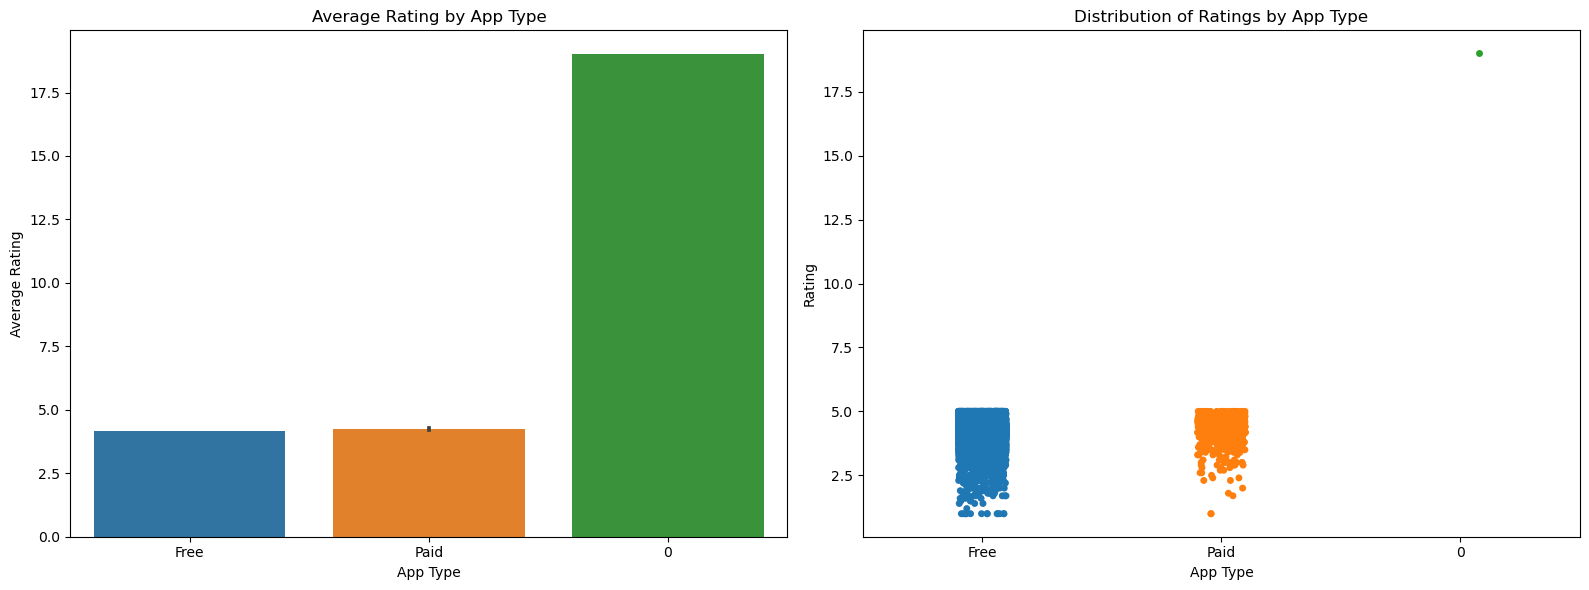

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# גרף עמודות המציג את דירוג האפליקציות הממוצע לפי סוג האפליקציה
sns.barplot(x='Type', y='Rating', data=data_cleaned, ax=axes[0])
axes[0].set_title('Average Rating by App Type')
axes[0].set_xlabel('App Type')
axes[0].set_ylabel('Average Rating')

# גרף נקודות המציג את התפלגות הדירוגים לפי סוג האפליקציה
sns.stripplot(x='Type', y='Rating', data=data_cleaned, ax=axes[1])
axes[1].set_title('Distribution of Ratings by App Type')
axes[1].set_xlabel('App Type')
axes[1].set_ylabel('Rating')


# התאמת הפריסה של הגרפים
plt.tight_layout()
plt.show()

הציפיה שלנו הייתה לראות שממוצע הדירוגים של אפליקציות שעולות כסף יהיה נמוך מהחינמיות כי באופן טבעי נהיה יותר ביקורתיים כלפי משהו שהוצאנו עליו כסף ונצפה ממנו להרבה יותר המסקנה שלנו היא דווקא להשקיע באפליקציות בתשלום (ולא בהכרח בחינמיות עם פרסומות) ואפילו לבחון את האופציה בהוספת אפליקציות בתשלום ולהשקיע בהן יותר מאמץ מהחינמיות

כאן ניתן לראות את הקשרים בין האפליקציות החינמיות והאפליקציות בתשלום לבין העמודה של הרייטינג.

ניתן לראות את ההבדל המהותי בין הגרפים. בגרך השמאלי לא רואים הבדל מהותי. אך בגרף הימני רואים 

In [51]:
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# יצירת תיבות box plot לאפליקציות בתשלום
trace0 = go.Box(
    y=data_new[data_new['Type'] == "Paid"]['Installs'],
    name='Paid'
)

# יצירת תיבות box plot לאפליקציות חינמיות
trace1 = go.Box(
    y=data_new[data_new['Type'] == "Free"]['Installs'],
    name='Free')

# הגדרת הפריסה של הגרף
layout = go.Layout(
    title="Number of downloads of paid apps vs. free apps",
    yaxis=dict(
        type='log',
        autorange=True
    )
)

# הוספת trace0 ו-trace1 לרשימה לצורך התרשים
data = [trace0, trace1]

# הצגת הגרף
pyo.iplot({'data': data, 'layout': layout})

AttributeError: Can only use .str accessor with string values!